In [1]:
import pandas as pd
import seaborn as sns

columns_headers = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship","study_hours",
    "party_week","drinks_night","missed_classes", "failed_classes", "in_relationship","parent_approve","relation_parent"
]
student_data = pd.read_csv("survey_student.csv", names = columns_headers, header = 0)

student_data.head()

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [2]:
student_data.drop("time", axis =1 , inplace=True)

## Exploratory Data Analysis (EDA)

* basic information
* traget specific : exploration and visualization
* correlation, chi-square

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           404 non-null    object 
 1   matric_%         399 non-null    float64
 2   study_year       333 non-null    object 
 3   faculty          399 non-null    object 
 4   gpa_2023         320 non-null    float64
 5   accomodation     383 non-null    object 
 6   allowance        375 non-null    object 
 7   scholarship      398 non-null    object 
 8   study_hours      403 non-null    object 
 9   party_week       404 non-null    object 
 10  drinks_night     404 non-null    object 
 11  missed_classes   403 non-null    object 
 12  failed_classes   403 non-null    object 
 13  in_relationship  403 non-null    object 
 14  parent_approve   402 non-null    object 
 15  relation_parent  403 non-null    object 
dtypes: float64(2), object(14)
memory usage: 50.9+ KB


In [4]:
student_data.isna().sum()

gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

-- description --

In [5]:
student_data.gender.value_counts(normalize=True)

gender
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

-- description --

In [6]:
# parent approval and Parent relationship
table = pd.crosstab(student_data.parent_approve, student_data.relation_parent)

table = table[["Distant", "Fair", "Close", "Very close"]]
table

relation_parent,Distant,Fair,Close,Very close
parent_approve,,,,
No,1,9,18,20
Yes,1,25,79,248


<Axes: xlabel='relation_parent'>

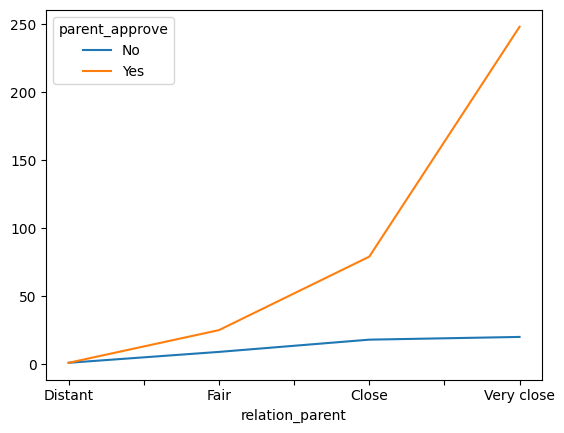

In [7]:
table.T.plot(kind = "line")

--description --

In [8]:
# relation with parent and score gained HS

group_parent_relation  = student_data.groupby(by = "relation_parent")

In [9]:
group_parent_relation["matric_%"].aggregate(("min","max","mean"))

,min,max,mean
relation_parent,,,
Close,60.0,98.33,77.690000
Distant,85.0,98.00,91.500000
Fair,55.0,95.50,78.357143
Very close,34.0,99.00,77.960114


<Axes: xlabel='matric_%', ylabel='gpa_2023'>

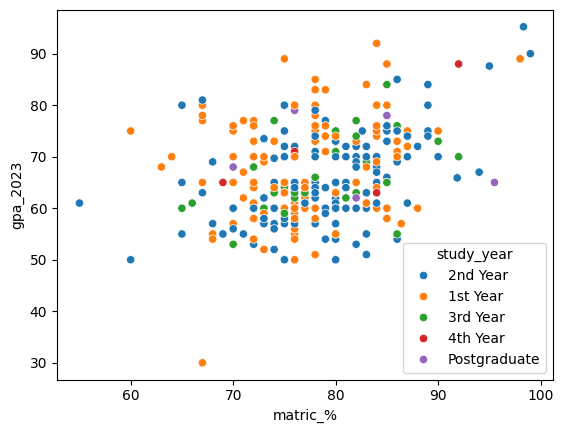

In [10]:
# Relationship with HS grade and 2023-grade

sns.scatterplot(student_data, x = "matric_%", y = "gpa_2023", hue = "study_year")

## Manipulation / Cleaning / Transforming / Processing Data

* remove unnecessary data
* Null Value Handling
* Outlier Handling
* Feature Engineering
* Encoding / Normalization / Post-processing

In [11]:
# Counting Null Values

student_data.isna().sum()

gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

In [12]:
# remove using thresholding

# student_data_1 = student_data[~(student_data.isna().sum(axis = 1) >= 5)]

student_data_1 = student_data.dropna(thresh = 8)

In [13]:
student_data_1.isna().sum()

gender              0
matric_%            5
study_year         71
faculty             5
gpa_2023           84
accomodation       21
allowance          29
scholarship         6
study_hours         1
party_week          0
drinks_night        0
missed_classes      1
failed_classes      1
in_relationship     1
parent_approve      2
relation_parent     1
dtype: int64

In [14]:
# Filling catagorical comuns with mode value

impute_with_mode = [
    'study_year', 'faculty', 'scholarship', 'study_hours', 'missed_classes', 
    'failed_classes', 'in_relationship','parent_approve', 'relation_parent'
]

for column in student_data_1.columns:
    if column in impute_with_mode:
        student_data_1[column].fillna(student_data_1[column].mode()[0], inplace=True)


/tmp/ipykernel_71164/1579608646.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data_1[column].fillna(student_data_1[column].mode()[0], inplace=True)
/tmp/ipykernel_71164/1579608646.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_1[column].fillna(student_data_1[column].mode()[0], inplace=True)


In [15]:
student_data_1.isna().sum()

gender              0
matric_%            5
study_year          0
faculty             0
gpa_2023           84
accomodation       21
allowance          29
scholarship         0
study_hours         0
party_week          0
drinks_night        0
missed_classes      0
failed_classes      0
in_relationship     0
parent_approve      0
relation_parent     0
dtype: int64

In [17]:
student_data_1.allowance.value_counts(dropna=False)

allowance
R 4001- R 5000     159
R 5001 - R 6000    101
R 6001 - R 7000     58
R 7001 - R 8000     30
NaN                 29
R 8000+             27
Name: count, dtype: int64

In [18]:
student_data_1.accomodation.value_counts(dropna=False)

accomodation
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
NaN                                                 21
Name: count, dtype: int64

In [23]:
# Clearnig null target values

student_data_2 = student_data_1.dropna(subset="gpa_2023")

In [24]:
student_data_2.isna().sum()

gender              0
matric_%            2
study_year          0
faculty             0
gpa_2023            0
accomodation        2
allowance          14
scholarship         0
study_hours         0
party_week          0
drinks_night        0
missed_classes      0
failed_classes      0
in_relationship     0
parent_approve      0
relation_parent     0
dtype: int64

In [20]:
# Outlier detection and cleaning

<Axes: >

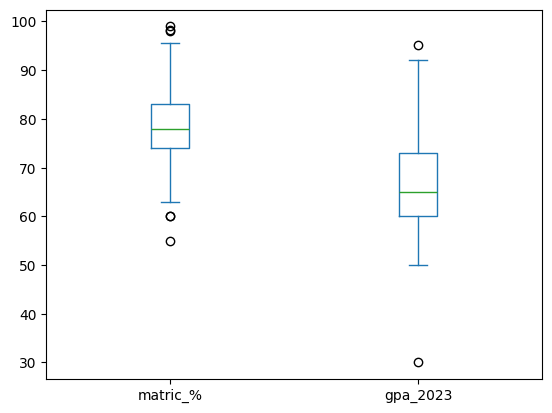

In [26]:
student_data_2[["matric_%","gpa_2023"]].plot(kind = "box")

In [27]:
def handle_outlier(series : pd.Series) -> pd.Series:
    """ __docs__ """
    IQR = series.quantile(0.75) - series.quantile(0.25)
    max_value = series.quantile(0.75) + 1.5 * IQR
    min_value = series.quantile(0.25) - 1.5 * IQR

    outliers = series[(series > max_value) | (series < min_value)]
    print(outliers)
    return series.drop(outliers.index, axis=0)

In [29]:
student_data_2.gpa_2023 = handle_outlier(student_data_2.gpa_2023)

73     95.22
303    30.00
Name: gpa_2023, dtype: float64


/tmp/ipykernel_71164/3274974121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_2.gpa_2023 = handle_outlier(student_data_2.gpa_2023)


# Saving Cleaned Data

In [30]:
student_data_2.to_csv("student_survey_clean.csv", index = False)

## Label Encoding and Normalization

In [31]:
# Encoding 

Nominal -> No- order -> One-hot
Ordinal -> Ordered or Rank -> Label Encoding

In [ ]:
# Normalization
